In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
df2 = pd.read_csv('table2- Total population.csv', index_col=[0], skiprows=14)
df4 = pd.read_csv('country_reference.csv')

In [4]:
df2.columns = ['Major area, region, country or area of destination', 'Notes',
       'Country code',
       'Total population (both sex)1990', 'Total population (both sex)1995',
       'Total population (both sex)2000', 'Total population (both sex)2005', 
       'Total population (both sex)2010', 'Total population (both sex)2015',
       'Total population (male)1990', 'Total population (male)1995',
       'Total population (male)2000', 'Total population (male)2005', 'Total population (male)2010', 'Total population (male)2015',
       'Total population (female)1990', 'Total population (female)1995',
       'Total population (female)2000', 'Total population (female)2005','Total population (female)2010', 'Total population (female)2015',
     ]

df_melt = df2.melt (
    id_vars=['Major area, region, country or area of destination', 'Notes', 'Country code' 
             ], 
    var_name=['year'], 
    value_name='amount'
    )
df_melt = df_melt.assign (
    Year = lambda x: x.year.str[-4:], Gender = lambda x:x.year.str[18:23]
)
df_melt = df_melt.drop(columns =['year'], axis=0)
df_melt = df_melt.replace('femal', 'female')

In [8]:
df = pd.read_csv('table1- International migrant stock.csv', index_col=[0], skiprows=14)
df2_data = df[['Major area, region, country or area of destination', 'Type of data (a)']]
merge = pd.merge(df_melt,df2_data,on=['Major area, region, country or area of destination'],how='left')
merge = merge.dropna(subset = ["Type of data (a)"]).drop(columns =['Type of data (a)']).rename(columns={"Major area, region, country or area of destination": "Country"})
final = merge.drop(columns =['Notes', 'Country']).rename(columns={"amount": "Population"})

In [27]:
final['Country code'] = final['Country code'].apply(lambda x: x.replace('.0','')).astype(int)
final

,Country code,Population,Year,Gender
9,108,5613.0,1990,both
10,174,415.0,1990,both
11,262,588.0,1990,both
12,232,3139.0,1990,both
13,231,48057.0,1990,both
...,...,...,...,...
4783,882,94.0,2015,female
4784,772,NaN,2015,female
4785,776,53.0,2015,female
4786,798,NaN,2015,female


In [12]:
final['Population'] = final['Population'].str.strip()
final['Population'] = final['Population'].str.replace(" ","")
final['Population'] = final['Population'].fillna(0)
final['Population'] = pd.to_numeric(final['Population'], errors='coerce')

<AxesSubplot:xlabel='Year', ylabel='Population'>

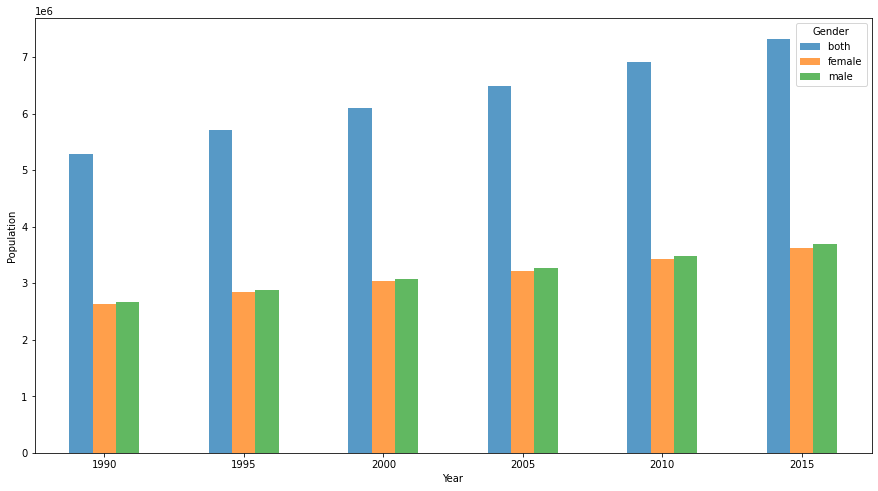

In [16]:
# graphic1, total population, gender
final["Gender"].replace({'male)': 'male'}, inplace=True)
final.groupby(['Year', 'Gender']).sum()
test4 = pd.DataFrame(final.groupby(['Year', 'Gender']).sum(), columns = ['Population'])

graphic_4 = pd.pivot_table(test4, index='Year', columns='Gender', values='Population')
graphic_4.plot(kind='bar', figsize=(15,8), alpha=0.75, rot=0, ylabel='Population')

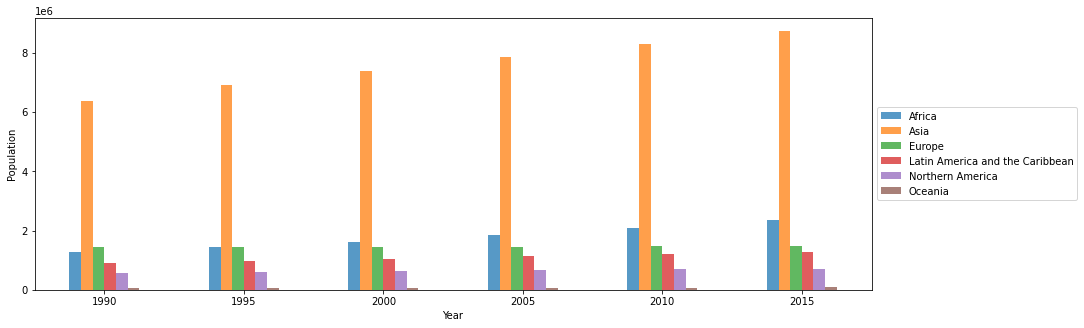

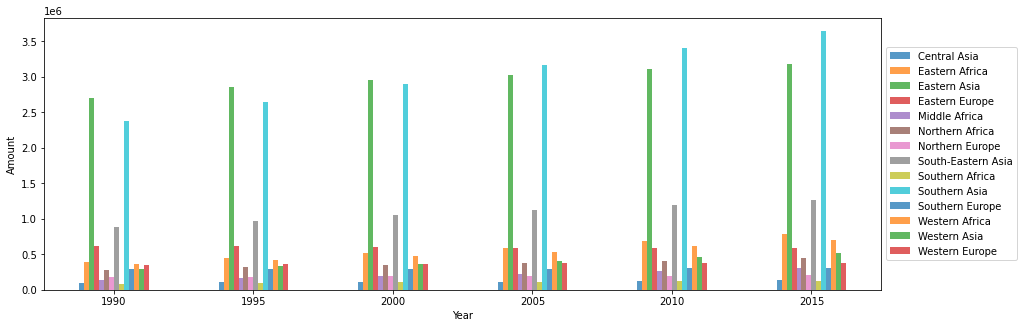

In [28]:
# graphic3, total population, major area, region
df4_reference = df4[['Country code','Major area' , 'Region', 'Developed region', 'Least developed country']]
df2_4 = pd.merge(final,df4_reference,on=['Country code'],how='left')

test5 = df2_4.groupby(['Year', 'Major area']).sum().drop(columns=['Country code'])
graphic_5 = pd.pivot_table(test5, index='Year', columns='Major area', values='Population')
graphic_5.plot(kind='bar', figsize=(15,5), alpha=0.75, rot=0, ylabel='Population').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

#highest 3: Asia, Africa, Europe, dive into these 3 areas region
test6 = df2_4.loc[(df2_4['Major area'] == 'Asia') | (df2_4['Major area'] == 'Africa')  
                   | (df2_4['Major area'] == 'Europe')].groupby(['Year', 'Region']).sum().drop(columns=['Country code'])
graphic_6 = pd.pivot_table(test6, index='Year', columns='Region', values='Population')
graphic_6.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [29]:
final.to_csv('final_table2.csv', index=False)